In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head(3) 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


<Axes: >

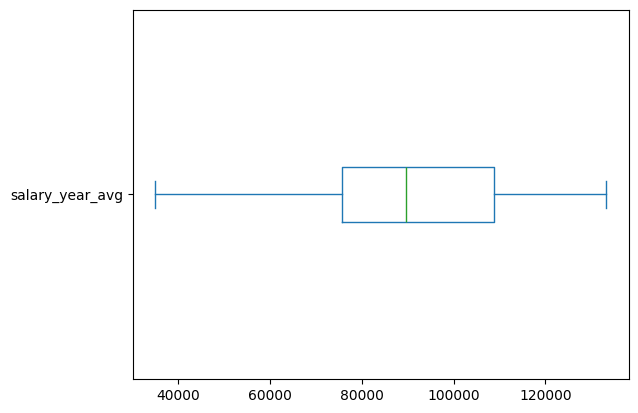

In [35]:
df_IN_DA = df[(df['job_title_short']=='Data Analyst') & (df['job_country'] =='United States')].copy()
df_IN_DA = df_IN_DA.dropna(subset='salary_year_avg')

df_IN_DA['salary_year_avg'].head(10).plot(kind='box',vert=False)

# df_IN_DA['salary_year_avg'].plot(kind='hist',bins=30,edgecolor='black')
# plt.xlim(0,250_000)
# ax = plt.gca()
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f'${int(x/1000)}k'))
# plt.title('Distribution of India Data Analyst Yearly Salaries')
# plt.xlabel('Yearly Salaries')
# plt.ylabel('Number of jobs')


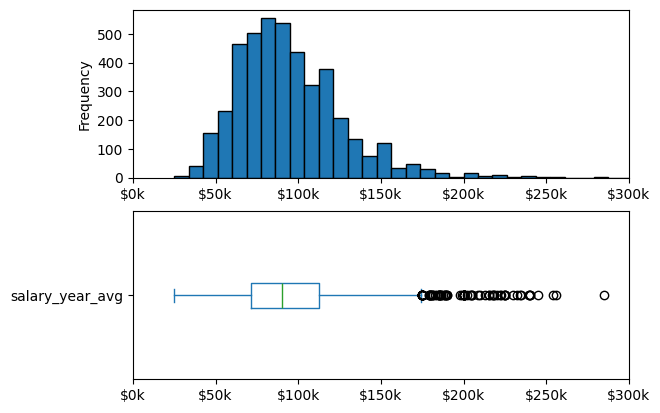

In [37]:
fig , ax = plt.subplots(2,1)
df_IN_DA['salary_year_avg'].plot(kind='hist',bins=40,edgecolor='black', ax=ax[0], xlim=(0,300_000))
df_IN_DA['salary_year_avg'].plot(kind='box',ax=ax[1], vert=False,  xlim=(0,300_000))
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f'${int(x/1000)}k'))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f'${int(x/1000)}k'))